In [1]:
import torch
from torchvision import datasets, transforms
import helper
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from network import Network

##### load model

In [2]:
checkpoint = torch.load('..\models\\4_sample_model.pth')

In [3]:
checkpoint.keys()

dict_keys(['input_size', 'output_size', 'hidden_layers', 'state_dict'])

#### Get parameters from the trained checkpoint to instantiate network class 

In [4]:
input_size = checkpoint['input_size']
output_size = checkpoint['output_size']
hidden_layers = checkpoint['hidden_layers']
state_dict = checkpoint['state_dict']

In [5]:
model = Network(input_size,output_size,hidden_layers)
model.load_state_dict(checkpoint['state_dict'])

<All keys matched successfully>

In [6]:
model

Network(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): Linear(in_features=32, out_features=10, bias=True)
  )
)

In [7]:
model.state_dict()

OrderedDict([('layers.0.weight',
              tensor([[0.1706, 0.1944, 0.1902,  ..., 0.2872, 0.2750, 0.1758],
                      [0.2243, 0.2366, 0.2358,  ..., 0.3288, 0.2077, 0.2067],
                      [0.1340, 0.1272, 0.1629,  ..., 0.1362, 0.1599, 0.1466],
                      ...,
                      [0.3212, 0.3235, 0.2614,  ..., 0.2259, 0.2245, 0.2772],
                      [0.0643, 0.0645, 0.1017,  ..., 0.1103, 0.0769, 0.1007],
                      [0.1082, 0.0696, 0.0609,  ..., 0.2561, 0.0828, 0.1015]])),
             ('layers.0.bias',
              tensor([-0.1478, -0.2211, -0.1639, -0.2107, -0.0302, -0.2076, -0.1014, -0.2314,
                      -0.0984, -0.0848, -0.0609, -0.1328, -0.0869, -0.1039, -0.0965, -0.1375,
                      -0.2348, -0.5515, -0.1796, -0.3863, -0.1603, -0.1185, -0.1224, -0.1049,
                      -0.1061, -0.3290, -0.1055, -0.2503, -0.2059, -0.1349, -0.2749, -0.3869,
                      -0.6780, -0.1488, -0.0614, -0.4729, -0.0

In [8]:
print(model)
model.eval()

Network(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): Linear(in_features=32, out_features=10, bias=True)
  )
)


Network(
  (layers): ModuleList(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): Linear(in_features=128, out_features=64, bias=True)
    (2): Linear(in_features=64, out_features=32, bias=True)
    (3): Linear(in_features=32, out_features=10, bias=True)
  )
)

In [9]:
# Transformation
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

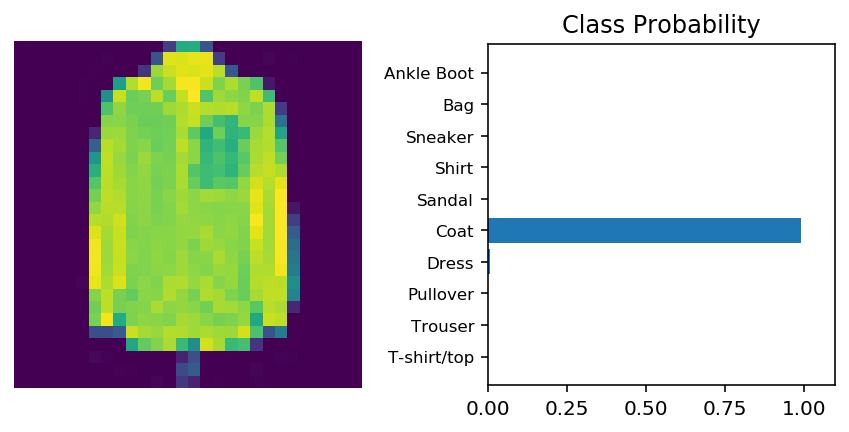

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import helper1

# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)
#Calculate the class probabilities (softmax) for img
with torch.no_grad():
    logps = model(img)
ps = torch.exp(logps)
# Plot the image and probabilities
helper1.view_classify(img.resize_(1, 28, 28), ps, version='Fashion')

In [17]:
ps.shape

torch.Size([1, 10])